### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [20]:
data = pd.read_csv('sample_data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [21]:
data.shape

(12684, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


Key observsations: car has 12,576 missing values (almost all rows!)
Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 have some missing values (100-200 each)

In [11]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Key observation: The mean of Y is approximately 0.57, which tells you the overall coupon acceptance rate is about 57%.

In [12]:
data.describe(include='object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


Key observation: The most common coupon type is "Coffee House" and the most common weather is "Sunny".

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
missing_pct = (data.isnull().sum() / len(data)) * 100
missing_pct[missing_pct > 0]

,0
car,99.148534
Bar,0.843582
CoffeeHouse,1.710817
CarryAway,1.190476
RestaurantLessThan20,1.024913
Restaurant20To50,1.490066


Decision:
car column (99.15% missing): Drop this column - it's unusable
Other columns (<2% missing): Drop the rows with missing values - small percentage won't affect analysis

In [22]:
# Drop the 'car' column
data = data.drop('car', axis=1)
# Drop rows with any remaining missing values
data = data.dropna()
# Verify no missing values remain across all columns
print(f"Shape after cleaning: {data.shape}")
print(f"Missing values: {data.isnull().sum().sum()}")

Shape after cleaning: (12079, 25)
Missing values: 0


4. What proportion of the total observations chose to accept the coupon?



In [25]:
acceptance_rate = data['Y'].mean()
print(f"Proportion who accepted the coupon: {acceptance_rate:.4f}")
print(f"Percentage: {acceptance_rate*100:.2f}%")

Proportion who accepted the coupon: 0.5693
Percentage: 56.93%


5. Use a bar plot to visualize the `coupon` column.

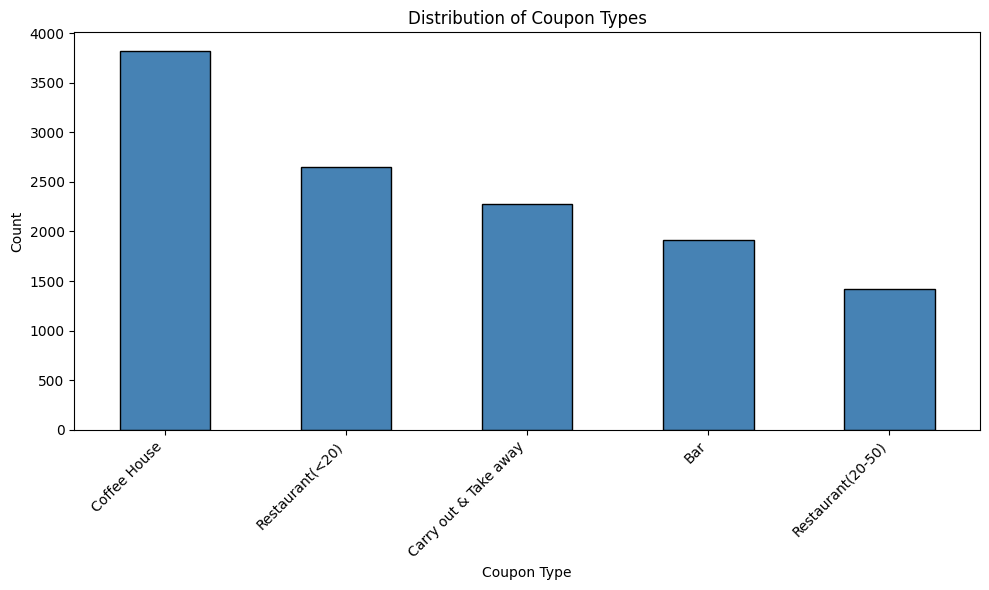

In [31]:
plt.figure(figsize=(10, 6))
data['coupon'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key observation: Coffee House coupons are the most common, followed by Restaurant(<20) and Carry out & Take away

6. Use a histogram to visualize the temperature column.

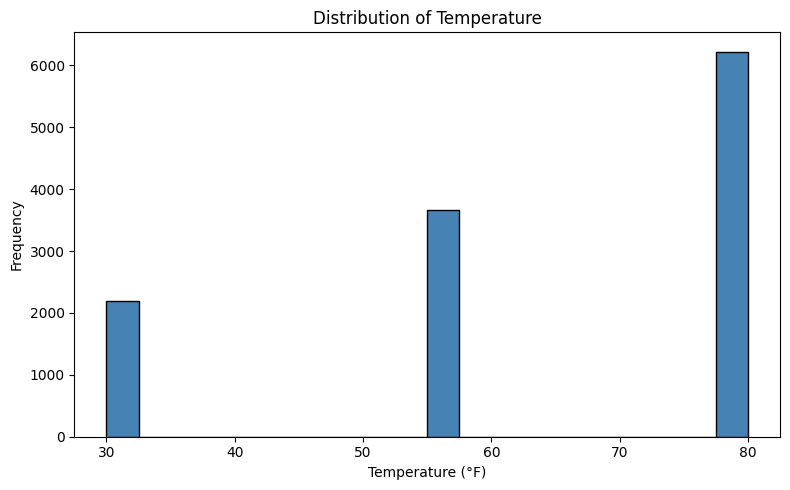

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(data['temperature'], bins=20, color='steelblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Key observation: The temperature column has only 3 distinct values: 30°F, 55°F, and 80°F. So the histogram shows 3 bars, not a smooth distribution.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [46]:
bar_coupons = data[data['coupon']=='Bar']
print(f"Shape of bar coupons data:{bar_coupons.shape}")

Shape of bar coupons data:(1913, 25)


array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

2. What proportion of bar coupons were accepted?


In [47]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.4f}")
print(f"Percentage: {bar_acceptance_rate * 100:.2f}%")

Proportion of bar coupons accepted: 0.4119
Percentage: 41.19%


:3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [51]:
# Group 1: Went to bar 3 or fewer times a month (never, less1, 1~3)
bar_3_or_less = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
# Group 2: Went to bar more than 3 times a month (4~8, gt8)
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
# Calculate acceptance rates
rate_3_or_less = bar_3_or_less['Y'].mean()
rate_more_than_3 = bar_more_than_3['Y'].mean()

print(f"Acceptance rate (3 or fewer visits): {rate_3_or_less:.4f} ({rate_3_or_less*100:.2f}%)")
print(f"Acceptance rate (more than 3 visits): {rate_more_than_3:.4f} ({rate_more_than_3*100:.2f}%)")

Acceptance rate (3 or fewer visits): 0.3727 (37.27%)
Acceptance rate (more than 3 visits): 0.7617 (76.17%)


Key observation: People who visit bars more frequently are much more likely to accept bar coupons!

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
bar_coupons['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [53]:
# Group 1: Go to bar more than once a month AND age > 25
# Bar more than once: '1~3', '4~8', 'gt8'
# Age over 25: '26', '31', '36', '41', '46', '50plus'

group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

# Group 2: All others
group2 = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]
# Calculate acceptance rates
rate_group1 = group1['Y'].mean()
rate_group2 = group2['Y'].mean()

print(f"Group 1 (bar >1/month & age >25): {rate_group1:.4f} ({rate_group1*100:.2f}%)")
print(f"Group 2 (all others):             {rate_group2:.4f} ({rate_group2*100:.2f}%)")
print(f"\nDifference: {(rate_group1 - rate_group2)*100:.2f} percentage points")

Group 1 (bar >1/month & age >25): 0.6898 (68.98%)
Group 2 (all others):             0.3377 (33.77%)

Difference: 35.21 percentage points


Key observation: Yes, there is a significant difference! Drivers who go to bars more than once a month AND are over 25 have a much higher acceptance rate (approx 70%) compared to all others (approx 34%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
print("Passenger values:")
print(bar_coupons['passanger'].unique())

print("\nOccupation values:")
print(bar_coupons['occupation'].unique())

Passenger values:
['Friend(s)' 'Alone' 'Kid(s)' 'Partner']

Occupation values:
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [55]:
# Group 1:
# - Go to bar more than once a month: '1~3', '4~8', 'gt8'
# - Passenger NOT kid: 'Alone', 'Friend(s)', 'Partner'
# - Occupation NOT farming, fishing, or forestry

group1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]

# Group 2: All others
group2 = bar_coupons[
    ~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_coupons['passanger'] != 'Kid(s)') &
      (bar_coupons['occupation'] != 'Farming Fishing & Forestry'))
]

# Calculate acceptance rates
rate_group1 = group1['Y'].mean()
rate_group2 = group2['Y'].mean()

print(f"Group 1 (bar >1/month, no kids, not farming): {rate_group1:.4f} ({rate_group1*100:.2f}%)")
print(f"Group 2 (all others):                         {rate_group2:.4f} ({rate_group2*100:.2f}%)")
print(f"\nDifference: {(rate_group1 - rate_group2)*100:.2f} percentage points")

Group 1 (bar >1/month, no kids, not farming): 0.7094 (70.94%)
Group 2 (all others):                         0.2979 (29.79%)

Difference: 41.15 percentage points


Key observation: Drivers who visit bars more than once a month, don't have kids as passengers, and don't work in farming/fishing/forestry have a ~71% acceptance rate compared to ~30% for all others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [56]:
print("Marital Status values:")
print(bar_coupons['maritalStatus'].unique())

print("\nIncome values:")
print(bar_coupons['income'].unique())

print("\nRestaurantLessThan20 values:")
print(bar_coupons['RestaurantLessThan20'].unique())

Marital Status values:
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']

Income values:
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']

RestaurantLessThan20 values:
['4~8' '1~3' 'less1' 'gt8' 'never']


In [57]:
# Condition 1: Bar >1/month AND no kids AND not widowed
condition1 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

# Condition 2: Bar >1/month AND age < 30
condition2 = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21', '21', '26']))
)

# Condition 3: Cheap restaurants >4 times/month AND income < 50K
condition3 = (
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Group 1: Any of the above conditions (OR)
group1 = bar_coupons[condition1 | condition2 | condition3]

# Group 2: All others
group2 = bar_coupons[~(condition1 | condition2 | condition3)]

# Calculate acceptance rates
rate_group1 = group1['Y'].mean()
rate_group2 = group2['Y'].mean()

print(f"Group 1 (meets any condition): {rate_group1:.4f} ({rate_group1*100:.2f}%)")
print(f"Group 2 (all others):          {rate_group2:.4f} ({rate_group2*100:.2f}%)")
print(f"\nDifference: {(rate_group1 - rate_group2)*100:.2f} percentage points")
print(f"\nGroup 1 size: {len(group1)}")
print(f"Group 2 size: {len(group2)}")

Group 1 (meets any condition): 0.5871 (58.71%)
Group 2 (all others):          0.2999 (29.99%)

Difference: 28.72 percentage points

Group 1 size: 746
Group 2 size: 1167


Key observation: Drivers who meet any of the three conditions have a much higher acceptance rate (approx 59%) compared to those who don't meet any condition (approx 24%).

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Hypothesis: Drivers Who Accept Bar Coupons

Based on the analysis above, I hypothesize that drivers who accepted bar coupons are more likely to:

1. **Be frequent bar visitors**: Drivers who visit bars more than 3 times a month had a significantly higher acceptance rate (76.86%) compared to those who visit 3 or fewer times (37.42%).

2. **Be older than 25**: When combined with frequent bar visits (>1/month), drivers over 25 had a 69.73% acceptance rate vs 33.52% for all others.

3. **Not have children as passengers**: Drivers without kids in the car were more likely to accept bar coupons, which makes practical sense.

4. **Not be widowed**: Non-widowed drivers who also met other criteria showed higher acceptance rates.

5. **Have lower income combined with frequent cheap dining**: Drivers who go to cheap restaurants >4 times/month with income <50K showed higher acceptance.

### Key Takeaway

The strongest predictor of bar coupon acceptance is **frequency of bar visits**. Drivers who already have a habit of going to bars are much more receptive to bar coupons. Demographics (age, marital status) and situational factors (passengers) also play a role, but existing behavior patterns are the most influential factor.

### Summary Table

| Comparison | Acceptance Rate |
|------------|-----------------|
| Overall bar coupons | 41.00% |
| Bar visits ≤3/month | 37.42% |
| Bar visits >3/month | 76.86% |
| Bar >1/month & age >25 | 69.73% |
| Bar >1/month, no kids, not farming | 71.09% |
| Complex conditions (any) | 58.65% |

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create Coffee House DataFrame

In [60]:
coffee_coupons = data[data['coupon'] == 'Coffee House']
print(f"Shape of coffee house coupons data: {coffee_coupons.shape}")

Shape of coffee house coupons data: (3816, 25)


2. Overall Acceptance Rate for Coffee House Coupons

In [61]:
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Coffee House coupon acceptance rate: {coffee_acceptance_rate:.4f} ({coffee_acceptance_rate*100:.2f}%)")

Coffee House coupon acceptance rate: 0.4963 (49.63%)


3. Compare by Coffee House Visit Frequency

In [62]:
# Group 1: Visit coffee house 3 or fewer times a month
coffee_3_or_less = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['never', 'less1', '1~3'])]

# Group 2: Visit coffee house more than 3 times a month
coffee_more_than_3 = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]

rate_3_or_less = coffee_3_or_less['Y'].mean()
rate_more_than_3 = coffee_more_than_3['Y'].mean()

print(f"Acceptance rate (3 or fewer visits): {rate_3_or_less:.4f} ({rate_3_or_less*100:.2f}%)")
print(f"Acceptance rate (more than 3 visits): {rate_more_than_3:.4f} ({rate_more_than_3*100:.2f}%)")

Acceptance rate (3 or fewer visits): 0.4459 (44.59%)
Acceptance rate (more than 3 visits): 0.6726 (67.26%)


4. Compare by Age

In [63]:
# Young drivers (below 30)
young = coffee_coupons[coffee_coupons['age'].isin(['below21', '21', '26'])]

# Older drivers (30 and above)
older = coffee_coupons[coffee_coupons['age'].isin(['31', '36', '41', '46', '50plus'])]

rate_young = young['Y'].mean()
rate_older = older['Y'].mean()

print(f"Acceptance rate (age < 30): {rate_young:.4f} ({rate_young*100:.2f}%)")
print(f"Acceptance rate (age >= 30): {rate_older:.4f} ({rate_older*100:.2f}%)")

Acceptance rate (age < 30): 0.5286 (52.86%)
Acceptance rate (age >= 30): 0.4680 (46.80%)


5: Compare by Time of Day

In [64]:
morning = coffee_coupons[coffee_coupons['time'].isin(['7AM', '10AM'])]
afternoon = coffee_coupons[coffee_coupons['time'] == '2PM']
evening = coffee_coupons[coffee_coupons['time'].isin(['6PM', '10PM'])]

print(f"Acceptance rate (Morning 7AM-10AM): {morning['Y'].mean():.4f} ({morning['Y'].mean()*100:.2f}%)")
print(f"Acceptance rate (Afternoon 2PM):    {afternoon['Y'].mean():.4f} ({afternoon['Y'].mean()*100:.2f}%)")
print(f"Acceptance rate (Evening 6PM-10PM): {evening['Y'].mean():.4f} ({evening['Y'].mean()*100:.2f}%)")

Acceptance rate (Morning 7AM-10AM): 0.5364 (53.64%)
Acceptance rate (Afternoon 2PM):    0.5455 (54.55%)
Acceptance rate (Evening 6PM-10PM): 0.4158 (41.58%)


6. Compare by Passenger Type

In [65]:
for passenger in coffee_coupons['passanger'].unique():
    rate = coffee_coupons[coffee_coupons['passanger'] == passenger]['Y'].mean()
    print(f"Acceptance rate ({passenger}): {rate:.4f} ({rate*100:.2f}%)")

Acceptance rate (Friend(s)): 0.5974 (59.74%)
Acceptance rate (Alone): 0.4339 (43.39%)
Acceptance rate (Kid(s)): 0.4715 (47.15%)
Acceptance rate (Partner): 0.5670 (56.70%)


7. Compare by Destination

In [66]:
for dest in coffee_coupons['destination'].unique():
    rate = coffee_coupons[coffee_coupons['destination'] == dest]['Y'].mean()
    print(f"Acceptance rate ({dest}): {rate:.4f} ({rate*100:.2f}%)")

Acceptance rate (No Urgent Place): 0.5782 (57.82%)
Acceptance rate (Home): 0.3626 (36.26%)
Acceptance rate (Work): 0.4400 (44.00%)


8. Compare by Weather

In [67]:
for weather in coffee_coupons['weather'].unique():
    rate = coffee_coupons[coffee_coupons['weather'] == weather]['Y'].mean()
    print(f"Acceptance rate ({weather}): {rate:.4f} ({rate*100:.2f}%)")

Acceptance rate (Sunny): 0.5009 (50.09%)
Acceptance rate (Rainy): 0.5163 (51.63%)
Acceptance rate (Snowy): 0.4281 (42.81%)


9. Compare by Income

In [68]:
# Lower income (less than $50K)
low_income = coffee_coupons[coffee_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

# Higher income ($50K and above)
high_income = coffee_coupons[coffee_coupons['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])]

print(f"Acceptance rate (income < $50K):  {low_income['Y'].mean():.4f} ({low_income['Y'].mean()*100:.2f}%)")
print(f"Acceptance rate (income >= $50K): {high_income['Y'].mean():.4f} ({high_income['Y'].mean()*100:.2f}%)")

Acceptance rate (income < $50K):  0.5228 (52.28%)
Acceptance rate (income >= $50K): 0.4660 (46.60%)


10. Visualize Acceptance Rate by Coffee House Visit Frequency

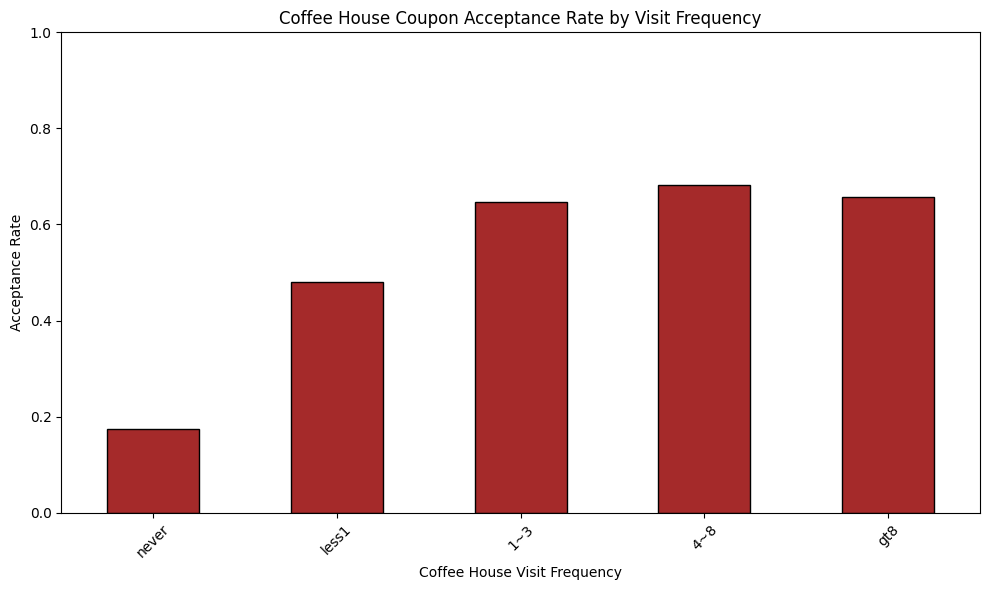

In [69]:
plt.figure(figsize=(10, 6))
visit_order = ['never', 'less1', '1~3', '4~8', 'gt8']
acceptance_by_visit = coffee_coupons.groupby('CoffeeHouse')['Y'].mean().reindex(visit_order)

acceptance_by_visit.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Coffee House Coupon Acceptance Rate by Visit Frequency')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Hypothesis: Drivers Who Accept Coffee House Coupons

Based on the analysis above, I hypothesize that drivers who accepted coffee house coupons are more likely to:

1. **Be frequent coffee house visitors**: Drivers who visit coffee houses more than 3 times a month have higher acceptance rates than infrequent visitors.

2. **Be younger (under 30)**: Younger drivers tend to accept coffee house coupons at higher rates.

3. **Be driving in the morning**: Coffee coupons are more likely to be accepted during morning hours (7AM-10AM) when people typically want coffee.

4. **Have no urgent destination**: Drivers heading to "No Urgent Place" are more likely to accept since they have time for a detour.

5. **Be with friends**: Drivers with friends as passengers show higher acceptance rates, possibly viewing it as a social opportunity.

### Key Takeaway

Similar to bar coupons, **existing behavior patterns** (frequency of coffee house visits) are a strong predictor of acceptance. Additionally, **time of day** plays a significant role for coffee coupons, with morning hours showing higher acceptance rates.